In [194]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar
import pandas as pd
import math

In [195]:
Area = np.power(16.6,2)
T = 25 + 273

X-axis (V in V):
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62]

Y-axis (I in A):
[ 0.86935014  0.87008458  0.86767882  0.87110531  0.8687225   0.87048245
  0.86959988  0.86775774  0.86622649  0.86992568  0.8697232   0.86874872
  0.87041837  0.86980552  0.86833835  0.87158358  0.87230569  0.87281597
  0.8715384   0.86908275  0.86867791  0.87408894  0.86717075  0.87046087
  0.86804968  0.87182069  0.86973697  0.86834437  0.86854255  0.86378998
  0.86163181  0.86192006  0.86417842  0.86272412  0.86074513  0.85943639
  0.85793364  0.85343963  0.85125911  0.85092175  0.85018003  0.84870577
  0.84028465  0.83961242  0.83152944  0.82986289  0.82231492  0.81256223
  0.80772209  0.79522085  0.78502083  0.77062136  0.75617296

Text(0.5, 1.0, 'IV Characteristic')

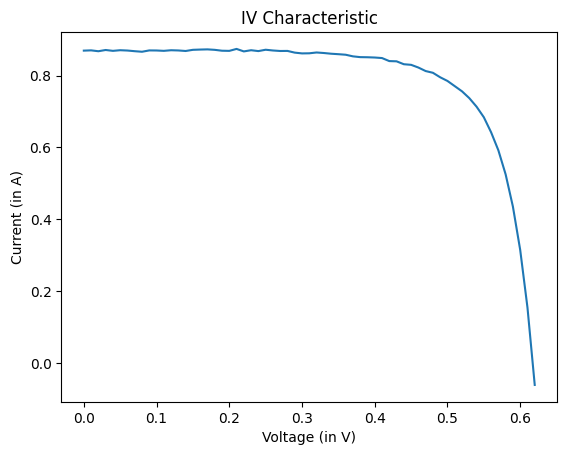

In [196]:
# Load the CSV file
file_path = '../Hardware/data_6.csv'
data = pd.read_csv(file_path, header=None, skiprows=1)

# Extracting values from the first and second columns
# I = np.array(data.iloc[:, 0])  # First column for I (in A)
# V = np.array(data.iloc[:, 1])  # Second column for V (in V)

V = np.array(data.iloc[:, 0])  # First column for I (in A)
I = np.array(data.iloc[:, 1])  # Second column for V (in V)



# I = np.array(data.iloc[:, 2])  # First column for I (in A)
# V = np.array(data.iloc[:, 3])  # Second column for V (in V)

# Display the arrays
print("X-axis (V in V):")
print(V)
print("\nY-axis (I in A):")
print(I)


plt.plot(V,I)
plt.xlabel('Voltage (in V)')
plt.ylabel('Current (in A)')
plt.title('IV Characteristic')

Text(0.5, 1.0, 'PV Characteristic')

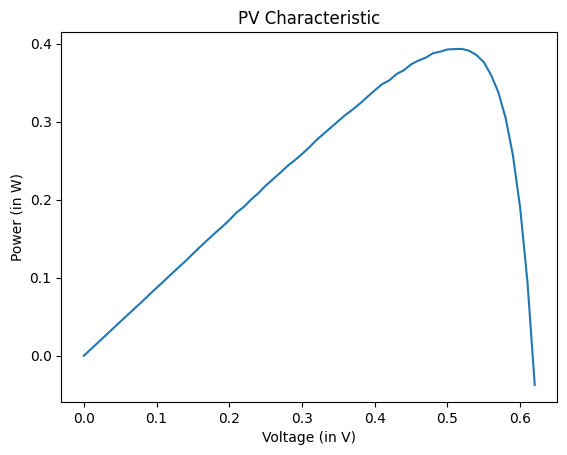

In [197]:
Voc = max(V)
Isc = max(I)

v = np.array(V)/Voc
i = np.array(I)/Isc

plt.plot(V,I*V)
plt.xlabel('Voltage (in V)')
plt.ylabel('Power (in W)')
plt.title('PV Characteristic')

Text(0.5, 1.0, 'IV Characteristic')

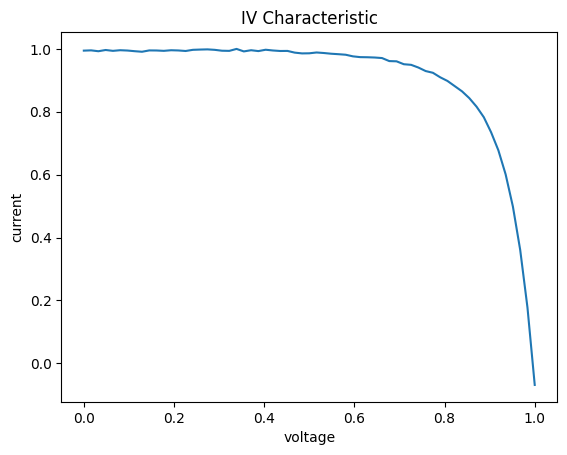

In [198]:
plt.plot(v,i)
plt.xlabel('voltage')
plt.ylabel('current')
plt.title('IV Characteristic')

In [199]:
def find_closest_indices(array, target):
    # Sort the array to ensure it is in order, and store the original indices
    sorted_array_with_indices = sorted(enumerate(array), key=lambda x: x[1])
    sorted_indices = [index for index, value in sorted_array_with_indices]
    sorted_array = [value for index, value in sorted_array_with_indices]

    # Initialize variables for lower and upper bounds
    lower_index = None
    upper_index = None

    # Find the closest lower and upper values
    for index, value in sorted_array_with_indices:
        if value < target:
            lower_index = index  # Update lower index
        elif value > target and upper_index is None:
            upper_index = index  # Update upper index
            break

    # Return the indices of the closest lower and upper values
    return lower_index, upper_index

def a_of_b(a_arr,b_arr,value):
    closest_indeices = find_closest_indices(b_arr,value)
    return (a_arr[closest_indeices[0]] + a_arr[closest_indeices[1]])/2

Voltage at maximum power: 0.8348370070253341
Maximum power: 0.7257131230964271


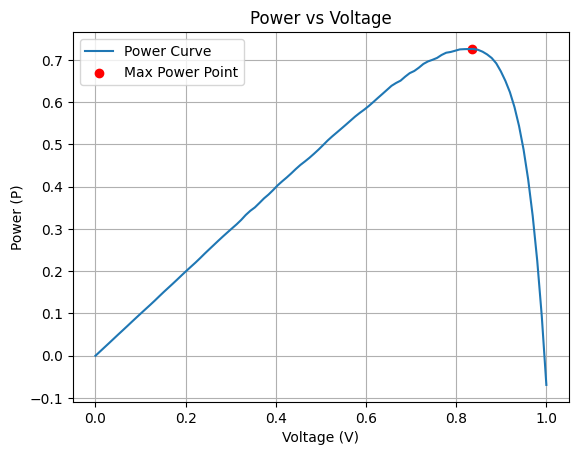

Vp =  0.5175989443557072 , Ip =  0.763397157  & Pp =  0.39513356258734805


In [200]:
# Step 1: Sort the data
sorted_indices = np.argsort(v)
v_sorted = v[sorted_indices]
i_sorted = i[sorted_indices]

# Remove duplicates from v_sorted (make it strictly increasing)
v_sorted, unique_indices = np.unique(v_sorted, return_index=True)

# Reorder i_sorted based on the indices of the unique sorted v values
i_sorted = i_sorted[unique_indices]


# Fit a cubic spline to I as a function of V
i_spline = CubicSpline(v_sorted, i_sorted)

# Step 2: Define power as a function of V
def power(v):
    return v * i_spline(v)

# Step 3: Find the maximum of P(V) using minimize_scalar (minimize -P(V))
result = minimize_scalar(lambda v: -power(v), bounds=(v_sorted.min(), v_sorted.max()), method='bounded')

# Step 4: Extract the voltage at maximum power and the maximum power value
vp = result.x
pp = power(vp)

# Output the results
print(f"Voltage at maximum power: {vp}")
print(f"Maximum power: {pp}")

# Optional: Plot the power curve
v_vals = np.linspace(v_sorted.min(), v_sorted.max(), 100)  # Generate smooth V values for plotting
p_vals = power(v_vals)

plt.plot(v_vals, p_vals, label="Power Curve")
plt.scatter([vp], [pp], color="red", label="Max Power Point")
plt.xlabel("Voltage (V)")
plt.ylabel("Power (P)")
plt.title("Power vs Voltage")
plt.legend()
plt.grid(True)
plt.show()


ip = a_of_b(i_sorted, v_sorted, vp)

Vp = vp * Voc
Ip = ip * Isc

Pp = Vp * Ip

print('Vp = ', Vp, ', Ip = ', Ip, ' & Pp = ', Pp)

In [201]:
FF = vp*ip
print('Fill Factor = ',FF)

gamma = (a_of_b(i,v,0.6) - 0.4)/0.6

m = (math.log10(0.4 - (((1-gamma)*a_of_b(v,i,0.6))/gamma))) / math.log10(a_of_b(v,i,0.6))

print('gamma = ',gamma,' & m = ',m)

Fill Factor =  0.7291159587652273
gamma =  0.9585481304580085  & m =  17.62048936555676


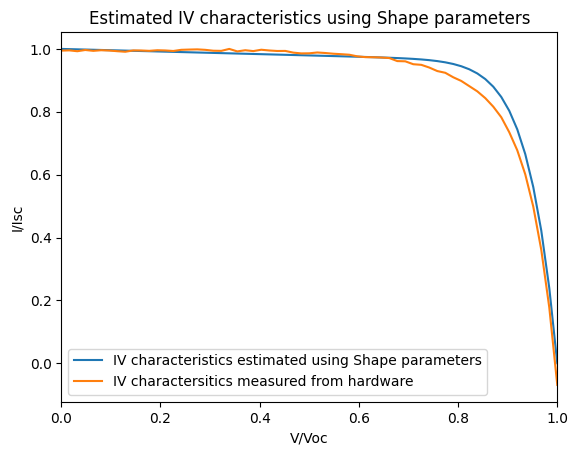

In [202]:
v_check = v

# We know the equation...
i_check = 1 - (1-gamma)*v -gamma*v**m

plt.plot(v_check,i_check,label='IV characteristics estimated using Shape parameters')
plt.plot(v,i,label='IV charactersitics measured from hardware')
plt.title('Estimated IV characteristics using Shape parameters')
plt.legend()
plt.xlabel('V/Voc')
plt.ylabel('I/Isc')
plt.xlim([0,1])
plt.show()


In [203]:
Jsc = Isc/Area

Rsh = Voc/(Jsc*(1-gamma))


T = 273.16 + 25

# Assumption zeta = 1, theta = 0.6 and Temp = 25 degC
zeta = 1.25
VT = (1.38*10**-23)*T/(1.6*10**-19)
K = 1/(zeta*VT)
theta = 0.6


Rs = ((Voc*K/m)-1) / (theta*gamma*Jsc*K)

print('Rseries = ',Rs,' ohm cm2')
print(Rs/Area, 'in ohm')
print('\nRshunt = ',Rsh,' ohm cm2')
print(Rsh/Area, 'in ohm')

Rseries =  1.6668729633029415  ohm cm2
0.006049038188789887 in ohm

Rshunt =  4715.286834642226  ohm cm2
17.111652034555902 in ohm
